In [ ]:
# Code to read csv file into Colaboratory:

import os
import os.path
import numpy as np
import time
import scipy
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.constraints import maxnorm
from keras import optimizers
import keras.backend as K
from keras.callbacks import EarlyStopping
#from keras.wrappers.scikit_learn import KerasRegressor

print(tf.__version__)

from keras.applications.vgg16 import VGG16
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.layers.convolutional import Convolution2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Dropout
from multiprocessing import Pool
import os
import time
import pandas as pd
import numpy as np
from keras.models import Model
import pickle

import torchsummary
import torchvision
import torch

2.3.0


In [ ]:
from fastai.vision import *
from fastai.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = Path('drive/My Drive')

get file names

In [ ]:
dir_1 = 'drive/My Drive/google_image_class/train/class_1'
dir_2 = 'drive/My Drive/google_image_class/train/class_2'
dir_3 = 'drive/My Drive/google_image_class/train/class_3'

In [ ]:
image_file_1 = os.listdir(dir_1)
image_file_2 = os.listdir(dir_2)
image_file_3 = os.listdir(dir_3)

In [ ]:
image_file_2[0]

'25128_9409.jpg'

low nighttime intensity


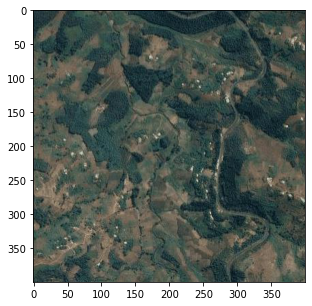

median nighttime intensity


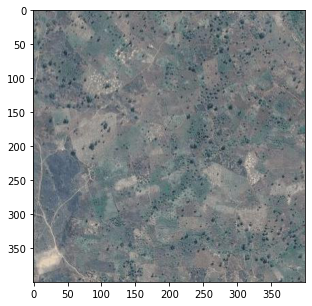

high nighttime intensity


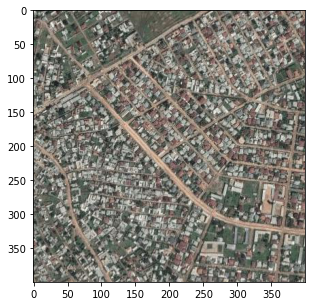

In [ ]:
low_file = dir_1+'/'+image_file_1[10]
med_file = dir_2+'/'+image_file_2[10]
high_file = dir_3+'/'+image_file_3[10]

# Display test images
figsize = (5,5)
#class1
print('low nighttime intensity')
plt.figure(figsize=figsize)
plt.imshow(mpimg.imread(low_file))
plt.show()

#class2
print('median nighttime intensity')
plt.figure(figsize=figsize)
plt.imshow(mpimg.imread(med_file))
plt.show()
#class3
print('high nighttime intensity')
plt.figure(figsize=figsize)
plt.imshow(mpimg.imread(high_file))
plt.show()


### Use transfer learning for cosine similarity

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2

In [ ]:
from keras.layers import Flatten, Dense, Input,concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout
from keras.models import Model
from keras.models import Sequential
import tensorflow as tf

#### load pre-trained CNN model (VGG16)

In [ ]:
#VGG
vgg16 = keras.applications.VGG16(weights='imagenet', 
                                 include_top=True, 
                                 pooling='max', input_shape=(224, 224, 3))

In [ ]:
# use “fc2” as extracted feature of image.
basemodel = Model(inputs=vgg16.input, 
                  outputs=vgg16.get_layer('fc2').output)

In [ ]:
basemodel.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# function to extract features
def get_feature_vector(img):
  img1 = cv2.resize(img, (224, 224))
  feature_vector = basemodel.predict(img1.reshape(1, 224, 224, 3))
  return feature_vector

In [ ]:
# calculate similarity
from scipy import spatial
def calculate_similarity(vector1, vector2):
  return 1 - spatial.distance.cosine(vector1, vector2)


In [ ]:
img1 = mpimg.imread(low_file)
img2 = mpimg.imread(med_file)
img3 = mpimg.imread(high_file)
f1 = get_feature_vector(img1)
f2 = get_feature_vector(img2)
f3 = get_feature_vector(img3)
print(calculate_similarity(f1, f2))
print(calculate_similarity(f2, f3)) 
print(calculate_similarity(f1, f3))

0.6112033724784851
0.48041701316833496
0.39945679903030396


In [ ]:
def Bootstrap_stat(size=10):
    '''
    function to perform bootstrapping to calculate 
    cosine simularity between two groups
    '''
    sim_11= np.empty(size)
    sim_22= np.empty(size)
    sim_33= np.empty(size)
    sim_12= np.empty(size)
    sim_23= np.empty(size)
    sim_13= np.empty(size)

    for i in range(size):
      data = range(len(image_file_1))
      bs1 = np.random.choice(data, size=2)
      bs2 = np.random.choice(data, size=2)
      bs3 = np.random.choice(data, size=2)
      low_file1 = dir_1+'/'+image_file_1[bs1[0]]
      med_file1 = dir_2+'/'+image_file_2[bs2[0]]
      high_file1 = dir_3+'/'+image_file_3[bs3[0]]
      low_file2 = dir_1+'/'+image_file_1[bs1[1]]
      med_file2 = dir_2+'/'+image_file_2[bs2[1]]
      high_file2 = dir_3+'/'+image_file_3[bs3[1]]

      img11 = mpimg.imread(low_file1)
      img21 = mpimg.imread(med_file1)
      img31 = mpimg.imread(high_file1)
      img12 = mpimg.imread(low_file2)
      img22 = mpimg.imread(med_file2)
      img32 = mpimg.imread(high_file2)
      
      f11 = get_feature_vector(img11)
      f21 = get_feature_vector(img21)
      f31 = get_feature_vector(img31)
      f12 = get_feature_vector(img12)
      f22 = get_feature_vector(img22)
      f32 = get_feature_vector(img32)
      
      sim_12[i]=calculate_similarity(f11, f21)
      sim_23[i]=calculate_similarity(f21, f31) 
      sim_13[i]=calculate_similarity(f11, f31)
      sim_11[i]=calculate_similarity(f11, f12)
      sim_22[i]=calculate_similarity(f21, f22) 
      sim_33[i]=calculate_similarity(f31, f32)

    return pd.DataFrame({'sim11':sim_11, 'sim22':sim_22, 'sim33':sim_33,
                         'sim12':sim_12, 'sim23':sim_23, 'sim13':sim_13})

In [ ]:
df_sim= Bootstrap_stat(size=1000)

In [ ]:
df_sim.describe()

,sim11,sim22,sim33,sim12,sim23,sim13
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.633007,0.584359,0.522550,0.591764,0.511023,0.494771
std,0.147764,0.129708,0.145659,0.138894,0.136014,0.144689
min,0.209569,0.183163,0.154372,0.184513,0.161698,0.155655
25%,0.542581,0.497369,0.414752,0.493682,0.412961,0.386212
50%,0.671187,0.590173,0.521018,0.609130,0.506207,0.485411
75%,0.742123,0.677984,0.626790,0.698571,0.607480,0.598598
max,1.000000,1.000000,1.000000,0.877939,0.908287,0.878147


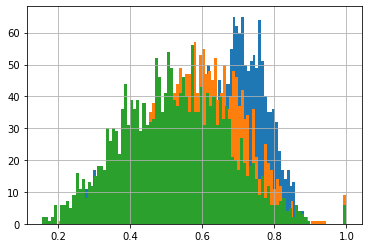

In [ ]:
ax = df_sim.sim11.hist(bins=100)
df_sim.sim22.hist(bins=100, ax=ax)
df_sim.sim33.hist(bins=100, ax=ax)
plt.show()

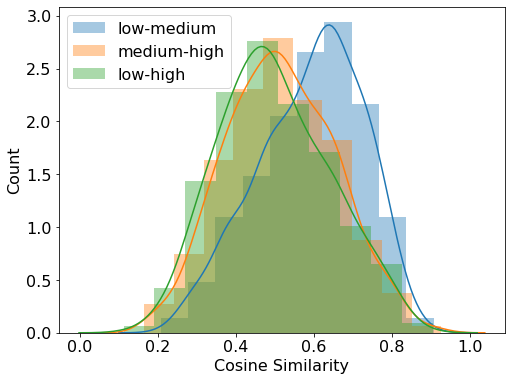

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
sns.distplot(df_sim.sim12, bins=10, label='low-medium')
sns.distplot(df_sim.sim23, bins=10,label='medium-high')
sns.distplot(df_sim.sim13, bins=10,label='low-high')
#plt.axvline(df_sim.sim12.mean(), color='r')
#plt.axvline(df_sim.sim23.mean(), color='r')
#plt.axvline(df_sim.sim13.mean(), color='r')

plt.legend()
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.show()

In [ ]:
from scipy import stats
rvs1= df_sim.sim11.values
rvs2= df_sim.sim22.values
rvs3= df_sim.sim33.values
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=11.065198235978315, pvalue=4.707735986702446e-28)

In [ ]:
stats.ttest_ind(rvs1,rvs3)

Ttest_indResult(statistic=23.80766261696203, pvalue=2.8311346306697107e-117)

In [ ]:
stats.ttest_ind(rvs2,rvs3)

Ttest_indResult(statistic=14.172270910161105, pvalue=1.6012336518749397e-44)